## Implementation of Dijkstra's Algorithm

1) Using adjacency list representation for the graph G = (V, E)

In [1]:
 import heapq

In [2]:
def dijkstra_adj_list(graph, source):
    """
    Implements Dijkstra's algorithm to find the shortest paths from a source node to all other nodes
    in a weighted graph represented as an adjacency list.

    Parameters:
        graph (dict): A dictionary where each key is a node and the value is a list of tuples.
                      Each tuple represents a neighboring node and the edge weight.
        source (any): The source node from which to calculate shortest paths.

    Returns:
        dict: A dictionary with nodes as keys and their shortest distance from the source as values.
    """

    # Initialize the distance to all nodes as infinity and the source node's distance as 0
    distances = {node: float('inf') for node in graph}
    distances[source] = 0

    # Priority queue to process nodes in order of their current known shortest distance
    priority_queue = [(0, source)]

    while priority_queue:
        # Extract the node with the smallest distance from the priority queue
        current_distance, current_node = heapq.heappop(priority_queue)

        # Skip processing if this distance is already larger than the known shortest distance
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors of the current node
        for neighbor, weight in graph[current_node]:
            # Calculate the tentative distance to the neighbor
            distance = current_distance + weight

            # If the calculated distance is shorter, update the shortest distance and push to queue (Relaxation and Decrease-Key operation)
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    # Return the computed shortest distances from the source to all nodes
    return distances


In [3]:
# Example usage
graph_adj_list = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 5)],
    'C': [('D', 1)],
    'D': []
}

# Taking A as source node
print(dijkstra_adj_list(graph_adj_list, 'A'))

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
def visualize_graph(graph, distances):
    """
    Visualizes the graph with shortest distances labeled.

    Parameters:
        graph (dict): The adjacency list representation of the graph.
        distances (dict): The shortest distances from the source node to each node.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    # Define positions for a circular layout
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

    # Draw edge labels with weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Add shortest distance labels to nodes
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.05, f"{distances[node]}", fontsize=9, ha='center', color='red')

    # Display the graph
    plt.title("Graph with Shortest Distances after Dijkstra's implementation")
    plt.show()

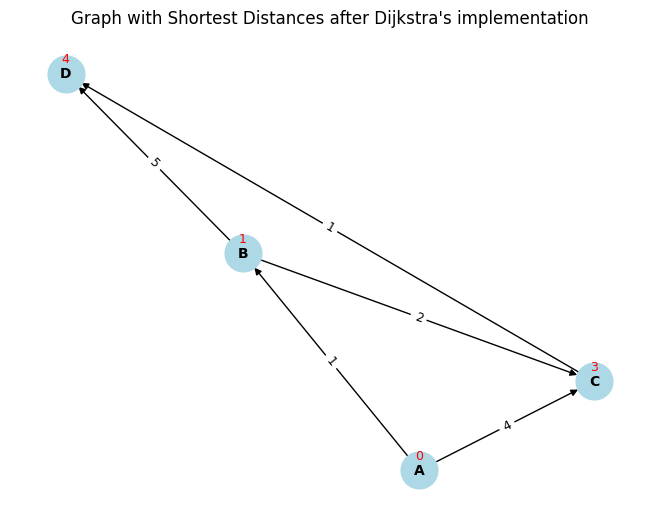

In [10]:
# Compute shortest distances
distances = dijkstra_adj_list(graph_adj_list, 'A')

# Visualize the graph with distances
visualize_graph(graph_adj_list, distances)

(2) Using adjacency matrix representation for the graph G=(V,E)

In [11]:
import numpy as np

In [12]:
def dijkstra_adj_matrix(graph, source):

    """
    Implements Dijkstra's algorithm to find the shortest paths from a source node to all other nodes
    in a weighted graph represented as an adjacency matrix.

    Parameters:
        graph (list of lists): A 2D list representing the adjacency matrix of the graph.
                              graph[i][j] is the weight of the edge from node i to node j, or inf if no edge exists.
        source (int): The index of the source node.

    Returns:
        dict: A dictionary with nodes as keys and their shortest distance from the source as values.
    """

    num_nodes = len(graph)
    distances = {i: float('inf') for i in range(num_nodes)}
    distances[source] = 0

    # Priority queue to process nodes in order of their current known shortest distance
    priority_queue = [(0, source)]

    while priority_queue:

        # Extract the node with the smallest distance from the priority queue
        current_distance, current_node = heapq.heappop(priority_queue)

        # Skip processing if this distance is already larger than the known shortest distance
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors of the current node
        for neighbor, weight in enumerate(graph[current_node]):
            if weight == float('inf'):
                continue  # Skip if no edge exists

            # Calculate the tentative distance to the neighbor
            distance = current_distance + weight

            # If the calculated distance is shorter, update the shortest distance and push to queue (Relaxation and Decrease-key operation)
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    # Return the computed shortest distances from the source to all nodes
    return distances

In [13]:
def visualize_graph_matrix(graph, distances):
    """
    Visualizes the graph with shortest distances labeled.

    Parameters:
        graph (list of lists): The adjacency matrix representation of the graph.
        distances (dict): The shortest distances from the source node to each node.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    num_nodes = len(graph)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if graph[i][j] != float('inf'):
                G.add_edge(i, j, weight=graph[i][j])

    # Define positions for a circular layout
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

    # Draw edge labels with weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Add shortest distance labels to nodes
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.05, f"{distances[node]}", fontsize=9, ha='center', color='red')

    # Display the graph
    plt.title("Graph with Shortest Distances after Dijkstra's implementation")
    plt.show()

In [14]:
# Example usage
graph_adj_matrix = [
    [0, 1, 4, float('inf')],
    [float('inf'), 0, 2, 5],
    [float('inf'), float('inf'), 0, 1],
    [float('inf'), float('inf'), float('inf'), 0]
]

# Compute shortest distances
distances_matrix = dijkstra_adj_matrix(graph_adj_matrix, 0)
print(distances_matrix)

{0: 0, 1: 1, 2: 3, 3: 4}


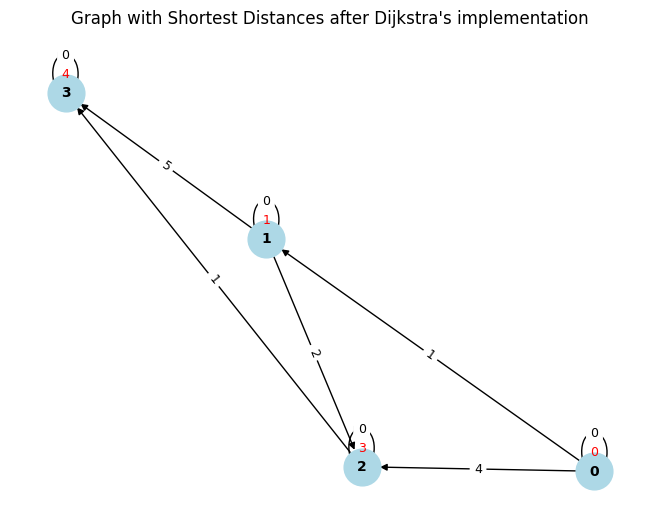

In [15]:
# Visualize the graph with distances
visualize_graph_matrix(graph_adj_matrix, distances_matrix)